<a href="https://colab.research.google.com/github/aravindh698/rep2/blob/master/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [126]:
df=pd.read_csv('GOLD.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      512 non-null    object 
 1   Price     512 non-null    int64  
 2   Open      512 non-null    int64  
 3   High      512 non-null    int64  
 4   Low       512 non-null    int64  
 5   Vol.      512 non-null    object 
 6   Change %  512 non-null    object 
 7   Pred      411 non-null    float64
 8   new       512 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [0]:
df.isnull().sum()
df['Date']=pd.DatetimeIndex(df['Date'])
df['Pred']=df['Pred'].fillna(method='ffill')
df=df[df['Open'] < 33850]

In [129]:
cdf=df[['Price','Open','High','Low','Pred','new']]
cdf.head(9)

,Price,Open,High,Low,Pred,new
0,28060,28400,28482,28025,738.0,117.570740
1,28184,28136,28382,28135,-146.0,295.430176
2,28119,28145,28255,28097,30.0,132.123714
3,27981,28125,28192,27947,357.0,101.298064
4,28007,28060,28146,27981,124.0,112.153318
5,28022,27995,28100,27945,149.0,182.427089
6,28019,28088,28195,27985,167.0,141.255137
7,28008,28049,28157,27996,22.0,120.069010
8,28109,28025,28159,28025,34.0,218.401641


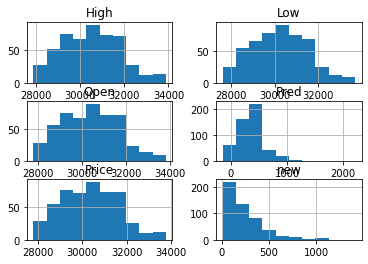

In [130]:
viz=cdf[['Price','Open','High','Low','Pred','new']]
viz.hist()
plt.show()

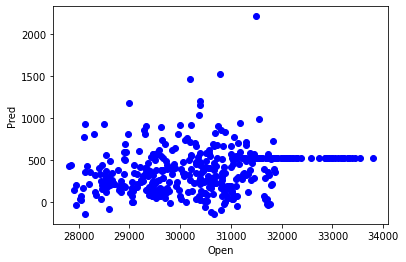

In [131]:
msk=np.random.rand(len(df)) < 0.80
train=cdf[msk]
test=cdf[~msk]
plt.scatter(train.Open,train.Pred,color='blue')
plt.xlabel("Open")
plt.ylabel("Pred")
plt.show()

In [132]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Open']])
train_y=np.asanyarray(train[['Pred']])
regr.fit(train_x,train_y)
print('coeff',regr.coef_)
print('intercept',regr.intercept_)

coeff [[0.05184819]]
intercept [-1195.58798032]


Text(0, 0.5, 'Pred')

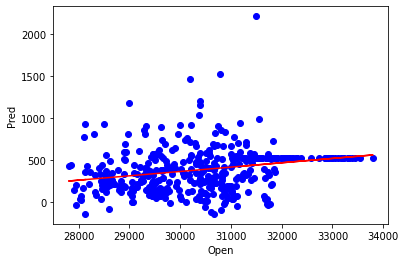

In [133]:
plt.scatter(train.Open, train.Pred,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Open")
plt.ylabel("Pred")


In [134]:
test_x = np.asanyarray(test[['Open']])
test_y = np.asanyarray(test[['Pred']])
test_y_ = regr.predict(test_x)
print(test_y_)


[[276.9006118 ]
 [263.67932339]
 [259.27222725]
 [255.90209491]
 [296.03259386]
 [291.57364953]
 [301.63219837]
 [330.77088107]
 [308.06137391]
 [284.10751019]
 [283.64087648]
 [271.8194892 ]
 [277.47094189]
 [283.22609097]
 [247.60638453]
 [264.45704624]
 [270.16034712]
 [277.67833465]
 [313.2461929 ]
 [330.30424736]
 [343.62923216]
 [378.00458204]
 [355.1913785 ]
 [339.89616249]
 [329.78576546]
 [345.59946337]
 [341.19236723]
 [319.93460939]
 [314.7497904 ]
 [344.30325863]
 [305.41711623]
 [289.86265927]
 [278.55975388]
 [289.60341832]
 [285.19632218]
 [325.22312476]
 [325.22312476]
 [344.35510682]
 [366.33873932]
 [362.96860698]
 [397.03286772]
 [385.62626595]
 [376.39728815]
 [392.0035933 ]
 [381.271018  ]
 [375.93065444]
 [403.41019507]
 [402.37323127]
 [420.83118686]
 [407.66174664]
 [424.30501558]
 [404.18791792]
 [424.2013192 ]
 [417.92768823]
 [390.34445122]
 [383.86342749]
 [385.8855069 ]
 [368.62005967]
 [355.81355677]
 [352.598969  ]
 [352.96190633]
 [336.52603015]
 [363.74

In [135]:
from sklearn.metrics import r2_score
print("r2: % .2f"% r2_score(test_y_,test_y))

r2: -6.98


In [147]:

# import libraries
import pandas as pd
import statsmodels.api as sm
fb = pd.read_csv('ASHOKA.csv', index_col='Date',)
sp_500 = pd.read_csv('Nifty50.csv', index_col='Date')

# joining the closing prices of the two datasets 
monthly_prices = pd.concat([fb['Close Price'], sp_500['Close']], axis=1)
monthly_prices.columns = ['FB', '^GSPC']

# check the head of the dataframe
print(monthly_prices.head())

# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

                 FB    ^GSPC
Date                        
15-May-2017  216.05  9445.40
16-May-2017  214.90  9512.25
17-May-2017  217.00  9525.75
18-May-2017  209.65  9429.45
19-May-2017  206.25  9427.90
                   FB     ^GSPC
Date                           
16-May-2017 -0.005323  0.007078
17-May-2017  0.009772  0.001419
18-May-2017 -0.033871 -0.010109
19-May-2017 -0.016218 -0.000164
22-May-2017 -0.022545  0.001098


In [148]:

# split dependent and independent variable
X = clean_monthly_returns['^GSPC']
y = clean_monthly_returns['FB']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     FB   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     38.29
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           1.29e-09
Time:                        01:56:22   Log-Likelihood:                 1083.9
No. Observations:                 493   AIC:                            -2164.
Df Residuals:                     491   BIC:                            -2155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.001     -0.993      0.3

In [149]:

# alternatively scipy linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(slope)


1.0415184035649745


Here we see that the beta value is 1.041 approximatly equal to one so it indicates that the price move along with the market 